<a href="https://colab.research.google.com/github/HermanMoreno98/Machine_Learning/blob/main/Regresi%C3%B3n_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerias

In [2]:
#Scikit-learn
import sklearn

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# Importando el dataset

In [63]:
#Montar Drive y leer datos
data = pd.read_csv("drive/MyDrive/CURSOS/MACHINE LEARNING/Data/train_titanic.csv",delimiter=",")
target = "Survived"

In [5]:
data.shape

(891, 12)

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
data.groupby(["Pclass"]).agg({"PassengerId":"count",
                              "Fare":"mean",
                              "Age":"mean",
                              "Survived":"mean"}).reset_index()

,Pclass,PassengerId,Fare,Age,Survived
0,1,216,84.154687,38.233441,0.629630
1,2,184,20.662183,29.877630,0.472826
2,3,491,13.675550,25.140620,0.242363


In [10]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)
sns.set(rc={"figure.figsize":(10,6)})

<Axes: xlabel='Survived', ylabel='count'>

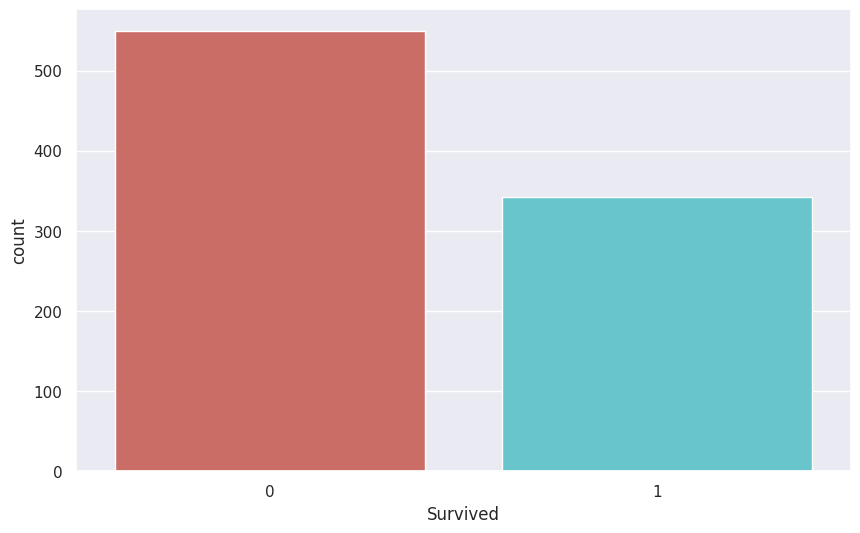

In [11]:
# Analizano el target
sns.countplot(x="Survived",data=data,palette="hls")

# Analisis de variables categoricas

<Axes: xlabel='Sex', ylabel='count'>

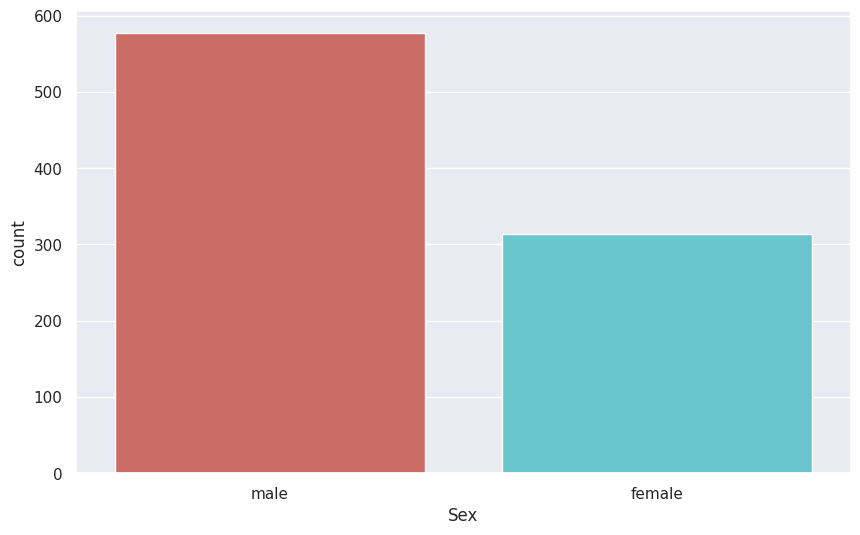

In [12]:
sns.countplot(x="Sex",data=data,palette="hls")

In [13]:
res = data.groupby(["Sex"]).agg({"PassengerId":"count",
                                 "Survived":"mean"}).reset_index()
                        
res              

,Sex,PassengerId,Survived
0,female,314,0.742038
1,male,577,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

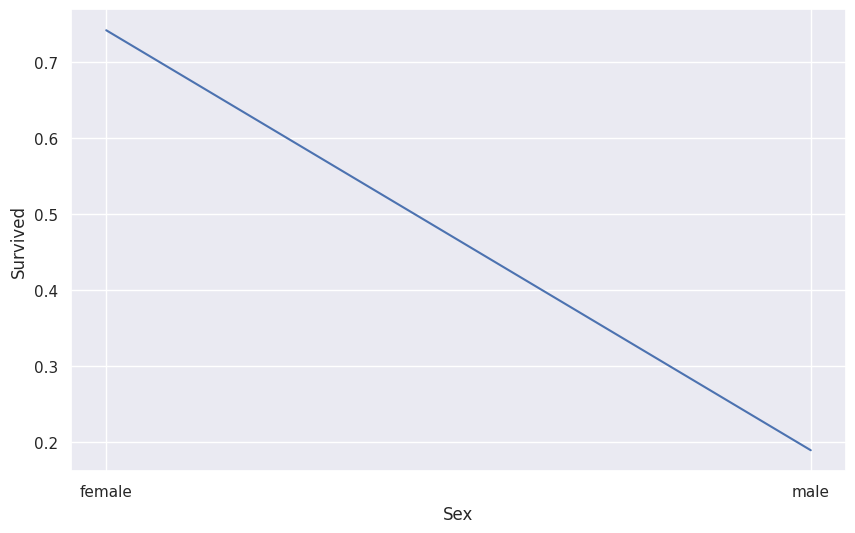

In [14]:
sns.lineplot(x="Sex",y="Survived",data=res)

<Axes: xlabel='Pclass', ylabel='Survived'>

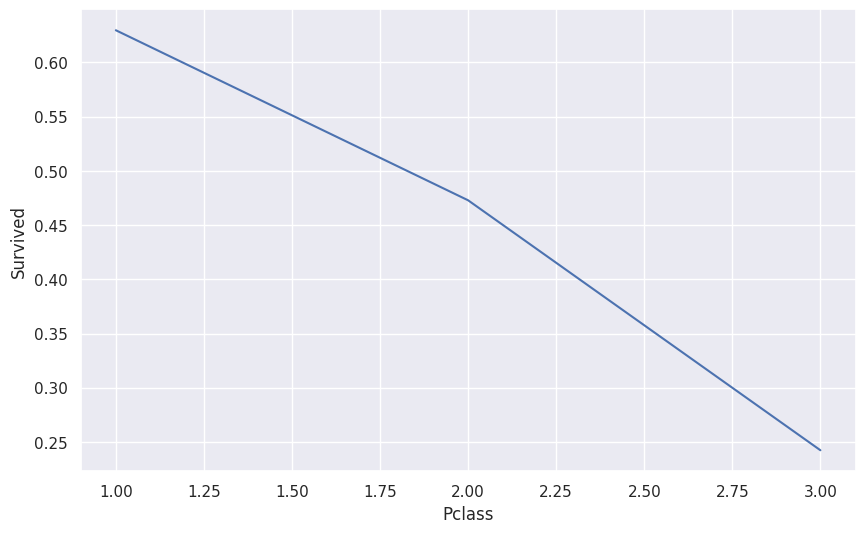

In [16]:
sns.lineplot(x="Pclass",y="Survived",data=data.groupby(["Pclass"]).agg({"PassengerId":"count","Survived":"mean"}).reset_index())

# Analisis de variables numericas

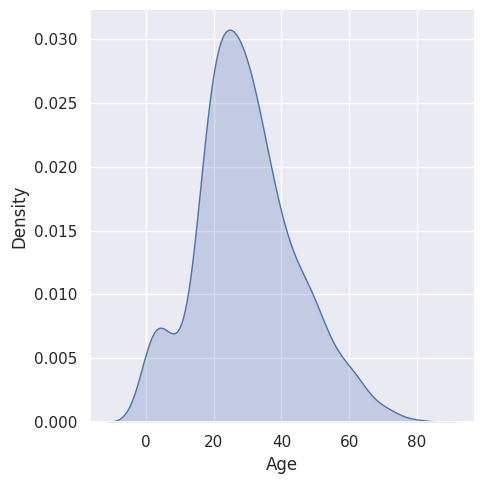

In [17]:
sns.displot(data,x="Age",kind="kde",fill=True)

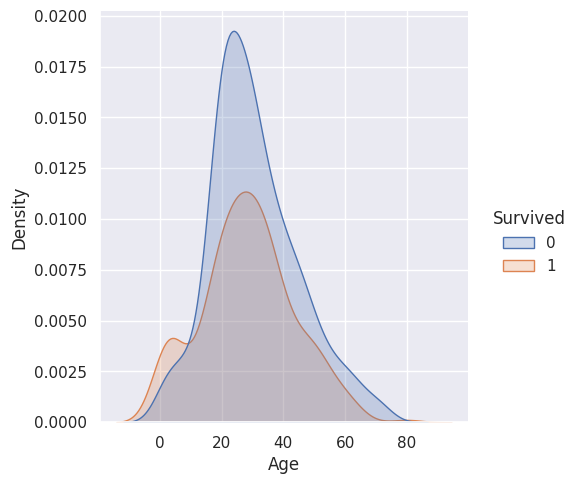

In [18]:
sns.displot(data,x="Age",hue="Survived",kind="kde",fill=True)

<Axes: xlabel='Survived', ylabel='Age'>

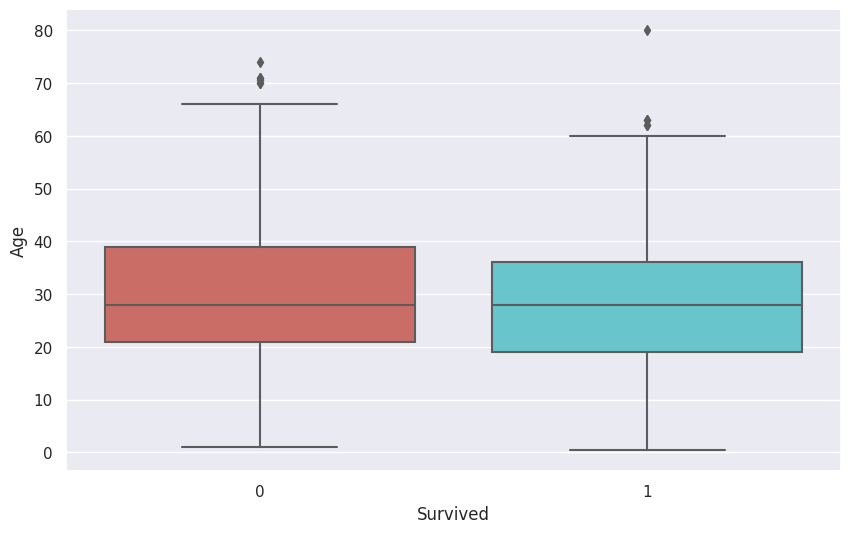

In [19]:
sns.boxplot(x="Survived",y="Age",data=data,palette="hls")

In [20]:
#Imputando los missings por la media
data["Fare"].fillna(data["Fare"].mean())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [21]:
data["Fare"].apply(lambda x:1 if x<100 else 2)

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: Fare, Length: 891, dtype: int64

<ipython-input-22-d5e0f22ee146>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["edad_cat"] = data.Age.apply(lambda x: catedad(x))


<Axes: xlabel='edad_cat', ylabel='Survived'>

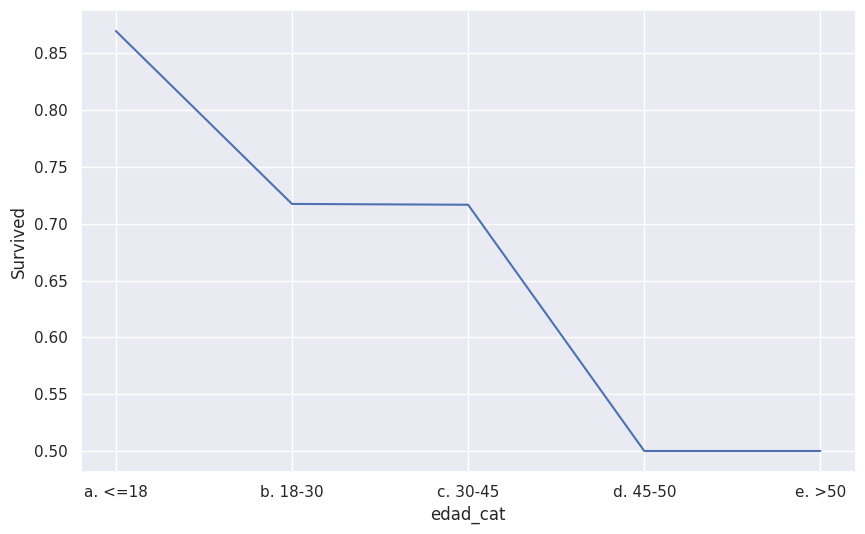

In [22]:
from math import isnan

def catedad(x):
  if isnan(x):
    return "missing"
  elif x<=18:
    return "a. <=18"
  elif x<=30:
    return "b. 18-30"
  elif x<=45:
    return "c. 30-45"
  elif x<=50:
    return "d. 45-50"
  else:
    return "e. >50"

temp = data.copy()
temp = data.dropna()
temp["edad_cat"] = data.Age.apply(lambda x: catedad(x))

sns.lineplot(x="edad_cat", y="Survived", data=temp.groupby(["edad_cat"]).agg({"PassengerId":"count",
                                                                              "Survived":"mean"}).reset_index())

In [23]:
temp.groupby(["edad_cat"]).agg({"PassengerId":"count","Survived":"mean"}).reset_index()

,edad_cat,PassengerId,Survived
0,a. <=18,23,0.869565
1,b. 18-30,46,0.717391
2,c. 30-45,60,0.716667
3,d. 45-50,22,0.500000
4,e. >50,32,0.500000


In [26]:
#Discretizar variable
from sklearn.preprocessing import KBinsDiscretizer

data["Age_cat"] = KBinsDiscretizer(n_bins=6,
                                   encode="ordinal",
                                   strategy="quantile").fit_transform(data[["Age"]].fillna(data[["Age"]].mean()))

<ipython-input-27-1c6c33b7da54>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data["Age_cat"], palette="hls", discrete=True)


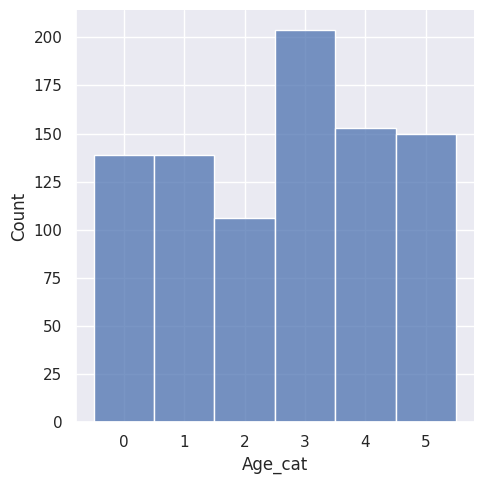

In [27]:
sns.displot(data["Age_cat"], palette="hls", discrete=True)

In [28]:
data[["Age","Age_cat","Survived"]]

,Age,Age_cat,Survived
0,22.0,1.0,0
1,38.0,4.0,1
2,26.0,2.0,1
3,35.0,4.0,1
4,35.0,4.0,0
...,...,...,...
886,27.0,2.0,0
887,19.0,1.0,1
888,NaN,3.0,0
889,26.0,2.0,1


In [29]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_cat']

In [31]:
aggregations = {"Survived":"mean","PassengerId":"count"}
res = data.groupby("Age_cat").agg(aggregations).reset_index()

In [32]:
res.head()

,Age_cat,Survived,PassengerId
0,0.0,0.503597,139
1,1.0,0.345324,139
2,2.0,0.358491,106
3,3.0,0.303922,204
4,4.0,0.450980,153


<Axes: xlabel='Age_cat', ylabel='Survived'>

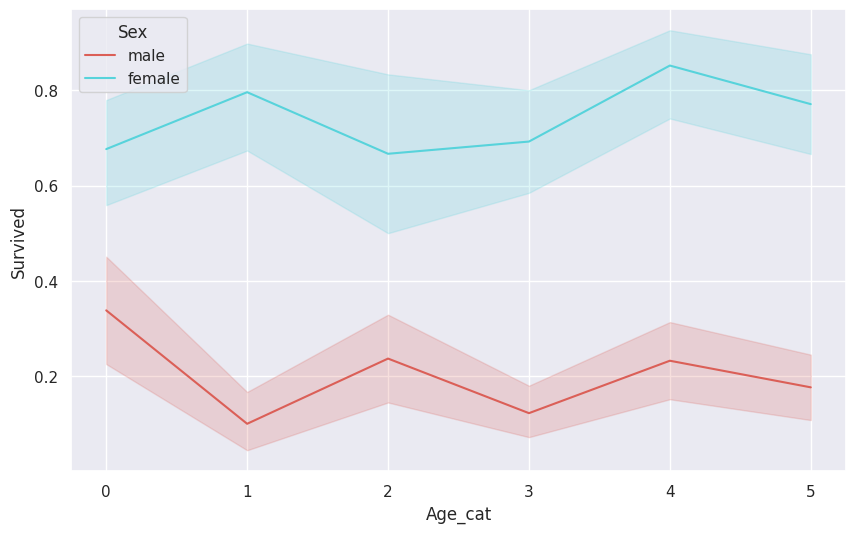

In [33]:
#Ratio del evento por tramo de la variable numerica
sns.lineplot(data=data, x="Age_cat", y="Survived", palette="hls", hue="Sex")

# Analisis multivariado

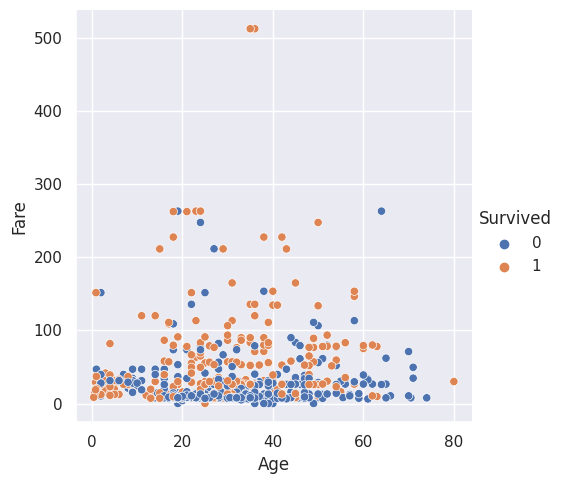

In [34]:
sns.relplot(data=data,x="Age",y="Fare",hue="Survived")

# Muestreo

In [71]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               test_size=0.3,
                               random_state=123)

# Tratamiento de variables

In [ ]:
#Es importante primero revisar en el dataset que las variables numericas sean realmente así, y no sean de tipo string, o viceversa.
data.select_dtypes("object")

In [36]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age_cat        float64
dtype: object

In [38]:
numFeatures = ["Age","Fare","SibSp","Parch"]
catFeatures = ["Pclass","Sex","Embarked"]

In [39]:
#Pclass es una variable categórica, pero inicialmente está configurado como numerica
data[catFeatures]

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S
...,...,...,...
886,2,male,S
887,1,female,S
888,3,female,S
889,1,male,C


# Encoding de variables categoricas


[Tipos de encodings](https://pub.towardsai.net/5-useful-encoding-techniques-in-machine-learning-f735567399f4)

## Label y one hot encoding

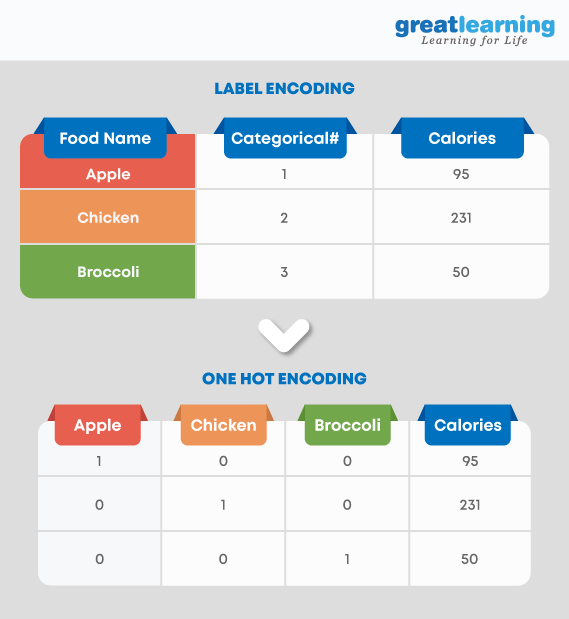

## Target encoding

[Ir a enlace](https://dev.to/berk_hakbilen/dealing-with-categorical-data-encoding-features-for-ml-agorithms-43pp)


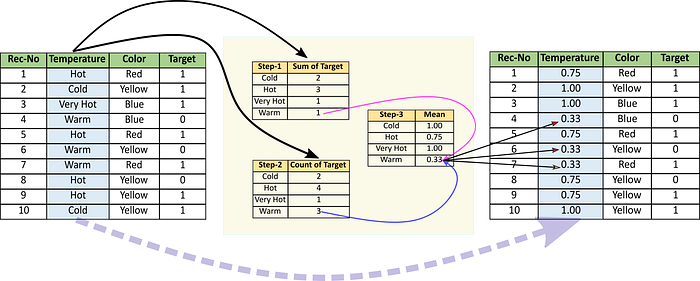

* WoEEncoder

se aplica logaritmo al ratio para suavizar

In [47]:
#Reemplazar las filas NaN por una categoria especifica
for i in catFeatures:
  data[i] = data[i].replace(np.nan,"missing")

data[catFeatures].drop_duplicates()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


In [53]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder(sparse_output=True)

In [74]:
OneHotEncoder.fit(train[catFeatures])

train[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(train[catFeatures]).toarray()
test[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(test[catFeatures]).toarray()

In [ ]:
data.head()

In [ ]:
# Target encoding (es importante hacer el particionamiento de la data en train y test)
!pip install category_encoders

In [79]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [80]:
#El calculo del target se tiene que hacer en train y la aplicacion, se hace por separado (train y test)
encoder.fit(train[catFeatures].astype("category"), train[target])
train[[x + "_coded" for x in catFeatures]] = encoder.transform(train[catFeatures]).astype("category")
test[[x + "_coded" for x in catFeatures]] = encoder.transform(test[catFeatures]).astype("category")
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_coded,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,...,0.345055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,...,0.559610,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,...,0.559610,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,...,0.345055,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,...,0.559610,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [81]:
test[["Sex","Sex_coded"]].drop_duplicates()

,Sex,Sex_coded
172,female,0.743243
524,male,0.197007


In [82]:
test[["Pclass","Pclass_coded"]].drop_duplicates()

,Pclass,Pclass_coded
172,3,0.259366
452,1,0.639455
397,2,0.465115


# Analisis univariado

In [108]:
univariate = train[numFeatures].describe(percentiles=[0.01,0.25,0.5,0.75,0.99]).transpose()
univariate.reset_index(inplace=True)
univariate.rename(columns={"index":"feature",
                           "1%":"P1",
                           "25%":"Q1",
                           "50%":"median",
                           "75%":"Q3",
                           "99%":"P99"},inplace=True)

univariate[["missing_rate"]] = 1 - univariate[["count"]] / train.shape[0]
univariate.sort_values(by="missing_rate", ascending = False, inplace=True)

In [109]:
univariate

,feature,count,mean,std,min,P1,Q1,median,Q3,P99,max,missing_rate
0,Age,492.0,29.885691,14.316719,0.42,1.0,21.000,28.0,38.0000,70.0000,80.0000,0.210273
1,Fare,623.0,33.326872,54.337449,0.00,0.0,7.925,14.4,30.5979,262.8625,512.3292,0.000000
2,SibSp,623.0,0.516854,1.143676,0.00,0.0,0.000,0.0,1.0000,7.3400,8.0000,0.000000
3,Parch,623.0,0.365971,0.784249,0.00,0.0,0.000,0.0,0.0000,3.0000,5.0000,0.000000


# Tratamiento de variables numericas

In [91]:
#Tratamiento de outliers por RIC

univariate["li_ric"] = univariate["Q1"] - 1.5*(univariate["Q3"] - univariate["Q1"])
univariate["ls_ric"] = univariate["Q3"] - 1.5*(univariate["Q3"] - univariate["Q1"])

univariate #los valores negativos se explican porque las distribuciones no son normales

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,li_ric,ls_ric
0,Age,492.0,29.885691,14.316719,0.42,21.000,28.0,38.0000,80.0000,0.210273,-4.50000,12.50000
1,Fare,623.0,33.326872,54.337449,0.00,7.925,14.4,30.5979,512.3292,0.000000,-26.08435,-3.41145
2,SibSp,623.0,0.516854,1.143676,0.00,0.000,0.0,1.0000,8.0000,0.000000,-1.50000,-0.50000
3,Parch,623.0,0.365971,0.784249,0.00,0.000,0.0,0.0000,5.0000,0.000000,0.00000,0.00000


In [92]:
def ric(dataframe,univariate,features_treatment):
  for col in features_treatment:
    desc = univariate.loc[univariate.feature==col]
    dataframe[col + "_ric"] = dataframe[col].apply(lambda x: desc.ls_ric.values[0] if x > desc.ls_ric.values[0]
                                                     else desc.li_ric.values[0] if x < desc.li_ric.values[0]
                                                     else x)
  return dataframe

In [110]:
#Tratamiento de outliers por percentiles

univariate["li_per"] = univariate["P1"] 
univariate["ls_per"] = univariate["P99"]


In [111]:
def ric(dataframe,univariate,features_treatment):
  for col in features_treatment:
    desc = univariate.loc[univariate.feature==col]
    dataframe[col + "_per"] = dataframe[col].apply(lambda x: desc.ls_per.values[0] if x > desc.ls_per.values[0]
                                                     else desc.li_per.values[0] if x < desc.li_per.values[0]
                                                     else x)
  return dataframe

In [112]:
train_I = ric(train,univariate,univariate.feature.tolist())
test_I = ric(test,univariate,univariate.feature.tolist())

In [114]:
test_I[['Age','Age_per']].describe()

,Age,Age_per
count,222.000000,222.00000
mean,29.285631,29.27027
std,15.005587,14.94890
min,0.750000,1.00000
25%,19.000000,19.00000
50%,28.000000,28.00000
75%,40.000000,40.00000
max,74.000000,70.00000


In [115]:
# Tratamiento de missings

featsTofill = [x + "_per" for x in numFeatures]
train_I[featsTofill] = train_I[featsTofill].fillna(train_I[featsTofill].median())
test_I[featsTofill] = test_I[featsTofill].fillna(train_I[featsTofill].median())

In [116]:
test_I[featsTofill].describe()

,Age_per,Fare_per,SibSp_per,Parch_per
count,268.000000,268.000000,268.000000,268.000000
mean,29.052239,29.594434,0.537313,0.391791
std,13.608803,36.652889,1.003042,0.734036
min,1.000000,0.000000,0.000000,0.000000
25%,21.750000,7.895800,0.000000,0.000000
50%,28.000000,15.372900,0.000000,0.000000
75%,35.000000,31.275000,1.000000,1.000000
max,70.000000,247.520800,5.000000,3.000000


# Estandarizacion

In [146]:
coded = ['Pclass_coded','Sex_coded','Embarked_coded']
for c in coded:
  train_I[c] = train_I[c].astype(float)
  test_I[c] = test_I[c].astype(float)

In [153]:
variables = ['Age_per','Fare_per','SibSp_per','Parch_per','Pclass_coded','Sex_coded','Embarked_coded']

train_II = train_I.copy()
test_II = test_I.copy()

train_II = (train_I[variables] - train_I[variables].mean()) / train_I[variables].std()
test_II = (test_I[variables] - train_I[variables].mean()) / train_I[variables].std()

In [154]:
test_II[variables].head()

,Age_per,Fare_per,SibSp_per,Parch_per,Pclass_coded,Sex_coded,Embarked_coded
172,-2.247443,-0.458269,0.447507,0.918294,-0.830134,1.342910,-0.550933
524,-0.116126,-0.543500,-0.464727,-0.494291,-0.830134,-0.743456,2.084435
452,0.041750,-0.095505,-0.464727,-0.494291,1.555023,-0.743456,2.084435
170,2.488817,0.030024,-0.464727,-0.494291,1.555023,-0.743456,-0.550933
620,-0.195063,-0.385769,0.447507,-0.494291,-0.830134,-0.743456,2.084435


# Logistic regression

In [155]:
#Variables para el modelo
numFeatures = ['Age_per','Fare_per','SibSp_per','Parch_per']
catFeatures = ['Pclass_coded','Sex_coded','Embarked_coded']

X_train = train_II[numFeatures + catFeatures]
X_test = test_II[numFeatures + catFeatures]

y_train = train.Survived
y_test = test.Survived

In [156]:
import statsmodels.api as sm

mod = sm.Logit(y_train, sm.add_constant(X_train))
res = mod.fit()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.447594
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.3314
Time:                        05:56:11   Log-Likelihood:                -278.85
converged:                       True   LL-Null:                       -417.09
Covariance Type:            nonrobust   LLR p-value:                 6.350e-56
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6045      0.108     -5.586      0.000      -0.817      -0.392
Age_per          

In [157]:
#Backward method: probar todas las variables y retirar iterativamente las variables hasta que todas sean significativas
#Forward "": empezar desde una variable hasta llegar a la significancia
mod_features = list(set(numFeatures + catFeatures) - set(['Fare_per','Parch_per','Embarked_coded']))
mod = sm.Logit(y_train, sm.add_constant(X_train[mod_features]))
res = mod.fit()

#Los signos son coherentes
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.449873
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.3280
Time:                        05:56:19   Log-Likelihood:                -280.27
converged:                       True   LL-Null:                       -417.09
Covariance Type:            nonrobust   LLR p-value:                 5.257e-58
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6049      0.107     -5.635      0.000      -0.815      -0.395
SibSp_per       -0.4199

In [160]:
#Analizando los parametros del modelo

modelo = pd.DataFrame({'coeficiente':res.params})
modelo.reset_index(inplace=True)
modelo.rename(columns={'index':'feature'},inplace=True)
modelo = modelo.loc[modelo.feature != 'const']
modelo['peso'] = abs(modelo.coeficiente)/abs(modelo.coeficiente).sum()
modelo.sort_values(by='peso', ascending=False, inplace=True)
modelo

#39% el sexo del pasajero (importancia del modelo)

<ipython-input-160-0a1922cf89cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo['peso'] = abs(modelo.coeficiente)/abs(modelo.coeficiente).sum()
<ipython-input-160-0a1922cf89cb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo.sort_values(by='peso', ascending=False, inplace=True)


,feature,coeficiente,peso
2,Sex_coded,1.292450,0.393517
4,Pclass_coded,0.990921,0.301709
3,Age_per,-0.581098,0.176929
1,SibSp_per,-0.419887,0.127844


# Correlaciones

In [162]:
#No hay ningun feature muy correlacionado
X_train[mod_features].corr()

,SibSp_per,Sex_coded,Age_per,Pclass_coded
SibSp_per,1.000000,0.122165,-0.192284,-0.062456
Sex_coded,0.122165,1.000000,-0.084885,0.127735
Age_per,-0.192284,-0.084885,1.000000,0.354816
Pclass_coded,-0.062456,0.127735,0.354816,1.000000


# Performance

In [171]:
train_II['probability'] = res.predict(sm.add_constant(train_II[mod_features]))
test_II['probability'] = res.predict(sm.add_constant(test_II[mod_features]))

# Para obtener la matriz de confusion
train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x>=0.5 else 0)
test_II['prediction'] = test_II['probability'].apply(lambda x: 1 if x>=0.5 else 0)

test_II['Survived'] = y_test

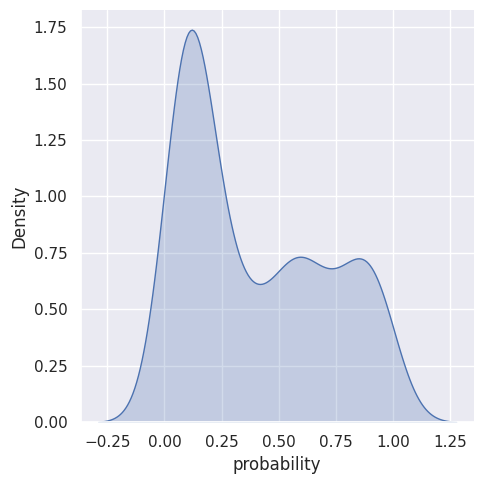

In [165]:
sns.displot(test_II,x='probability',kind='kde',fill=True)

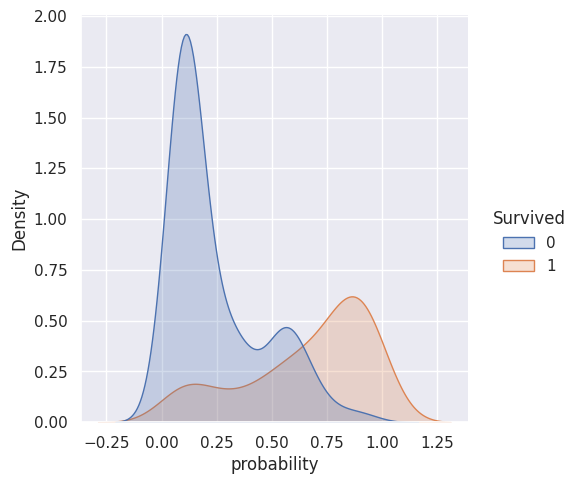

In [172]:
#El modelo es bueno porque a los que no han sobrevivido les asigna probabilidade bajas, y los que subrevivieron, tienen altas probabilidades
sns.displot(test_II,x='probability',hue='Survived', kind='kde',fill=True)

# Gini

In [173]:
from sklearn.metrics import *

In [174]:
def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()
     

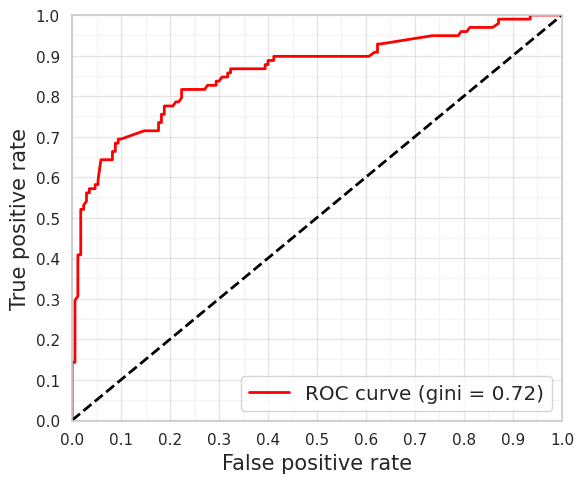

In [176]:
plot_roc_curve(y_test, test_II.probability, width=6, height=5)

In [177]:
# AUC
#Tanto en train como en test se parecen. Quiere decir que el modelo es bueno, y no hay presencia de overfitting

print('TRAIN AUC: %f' %(roc_auc_score(y_train, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(y_test, test_II.probability)))


TRAIN AUC: 0.851724
TEST AUC: 0.859214


In [178]:

# GINI

print('TRAIN GINI: %f' %(roc_auc_score(y_train, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(y_test, test_II.probability)*2-1))


TRAIN GINI: 0.703447
TEST GINI: 0.718427


In [179]:
# Tablas cruzadas

pd.crosstab(test_II.prediction, y_test, margins=True, margins_name="Total")

Survived,0,1,Total
prediction,,,
0,139,25,164
1,31,73,104
Total,170,98,268


In [180]:
pd.crosstab(test_II.prediction, y_test, margins=True, margins_name="Total", normalize=True)

Survived,0,1,Total
prediction,,,
0,0.518657,0.093284,0.61194
1,0.115672,0.272388,0.38806
Total,0.634328,0.365672,1.00000


In [182]:
# ACCURACY

print('TRAIN ACCURACY: %f' %(accuracy_score(y_train, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(y_test, test_II.prediction)))

# PRECISION

print('TRAIN PRECISION: %f' %(precision_score(y_train, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(y_test, test_II.prediction)))

# RECALL

print('TRAIN RECALL: %f' %(recall_score(y_train, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(y_test, test_II.prediction)))

# F1

print('TRAIN F1: %f' %(f1_score(y_train, train_II.prediction)))
print('TEST F1: %f' %(f1_score(y_test, test_II.prediction)))


TRAIN ACCURACY: 0.791332
TEST ACCURACY: 0.791045
TRAIN PRECISION: 0.745690
TEST PRECISION: 0.701923
TRAIN RECALL: 0.709016
TEST RECALL: 0.744898
TRAIN F1: 0.726891
TEST F1: 0.722772


In [181]:

#Resumen de todas las métricas del modelo

metricsLogisitc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logistic_train':[roc_auc_score(y_train, train_II.probability),
                                        (roc_auc_score(y_train, train_II.probability)*2-1),
                                        accuracy_score(y_train, train_II.prediction),
                                        precision_score(y_train, train_II.prediction),
                                        recall_score(y_train, train_II.prediction),
                                        f1_score(y_train, train_II.prediction)],

                                'logistic_test':[roc_auc_score(y_test, test_II.probability),
                                        (roc_auc_score(y_test, test_II.probability)*2-1),
                                        accuracy_score(y_test, test_II.prediction),
                                        precision_score(y_test, test_II.prediction),
                                        recall_score(y_test, test_II.prediction),
                                        f1_score(y_test, test_II.prediction)]})

metricsLogisitc

,metric,logistic_train,logistic_test
0,AUC,0.851724,0.859214
1,Gini,0.703447,0.718427
2,Accuracy,0.791332,0.791045
3,Precision,0.745690,0.701923
4,Recall,0.709016,0.744898
5,F1-score,0.726891,0.722772


# Analisis de prediccion

In [183]:
from sklearn.preprocessing import KBinsDiscretizer

test_II['probability_rank'] = KBinsDiscretizer(n_bins = 6, 
                                              encode = 'ordinal',
                                              strategy = "uniform").fit_transform(test_II[['probability']])

In [184]:
aggregations = {'prediction':'count','probability':'max','Survived':'mean'}
res = test_II.groupby('probability_rank').agg(aggregations).reset_index()

In [185]:
pddf1 = pd.DataFrame({'probability_rank':test_II.probability_rank,
                      'value':test_II.probability,
                     'type': 'probability_mean'})

pddf2 = pd.DataFrame({'probability_rank':test_II.probability_rank,
                      'value':test_II.Survived,
                     'type': 'Survived_rate'})

pddf = pddf1.append(pddf2)

<ipython-input-185-a7d24d67000d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pddf = pddf1.append(pddf2)


<Axes: xlabel='probability_rank', ylabel='value'>

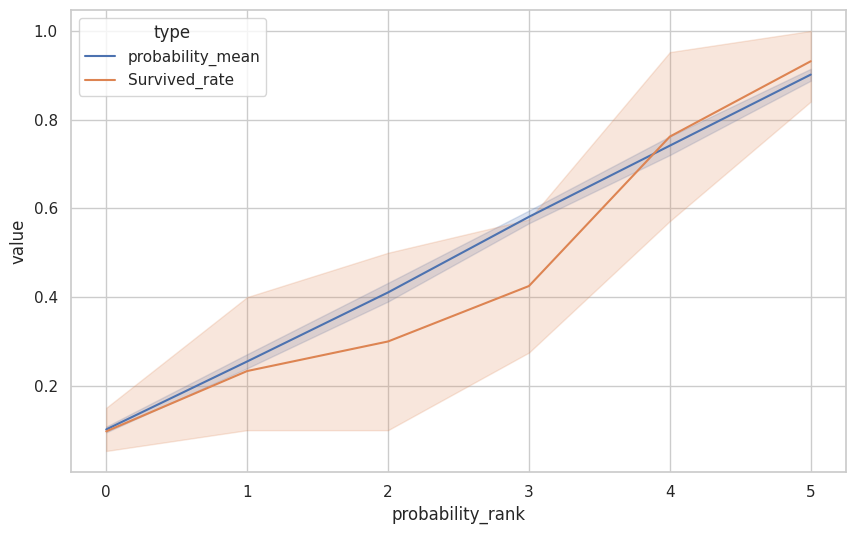

In [186]:

# Ratio del evento por tramo dela variable numérica

sns.lineplot(data=pddf.reset_index(), x="probability_rank", y="value", hue="type", markers=True, dashes=False)